In [2]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conexión (puedes cambiar nombre_bd según la entrega)
conn = mysql.connector.connect(
    host='212.227.90.6',
    user='Equipo19',
    password='E1q2u3i4p5o19',
    database='Equip_19'
)

cursor = conn.cursor()

# Obtener nombres de tablas
cursor.execute("SHOW TABLES")
tablas = [t[0] for t in cursor.fetchall()]

# Guardar todas las tablas en un diccionario de DataFrames
dfs = {tabla: pd.read_sql(f"SELECT * FROM {tabla}", conn) for tabla in tablas}

C:\Users\Usuario\AppData\Local\Temp\ipykernel_36824\2116393161.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {tabla: pd.read_sql(f"SELECT * FROM {tabla}", conn) for tabla in tablas}


In [3]:
df = dfs['Tourist_Accommodation']

In [4]:
df.describe().round(2)

,apartment_id,host_id,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,7001.00,7.001000e+03,7001.00,6998.00,6870.00,7001.00,7001.00,7001.00,7001.00,7001.00,7001.00,7001.00,5674.00,5665.00,5671.0,5660.00,5669.00,5659.00,5659.00,5747.00
mean,15119780.99,6.218673e+07,4.35,3.01,1011.10,4.42,759.47,12.28,27.42,44.31,188.13,34.13,920.23,94.54,93.2,96.29,96.43,95.31,91.46,123.04
std,7715577.75,5.747094e+07,2.62,2.33,845.98,10.67,497.96,11.51,22.41,33.02,129.96,59.94,85.35,9.06,9.7,7.96,7.61,7.30,9.31,153.16
min,11964.00,1.070400e+04,1.00,0.00,60.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,200.00,20.00,20.0,20.00,20.00,20.00,20.00,1.00
25%,8749646.00,1.050015e+07,2.00,1.00,450.00,1.00,70.00,0.00,2.00,9.00,66.00,1.00,890.00,90.00,90.0,90.00,90.00,90.00,90.00,17.00
50%,16737061.00,4.261380e+07,4.00,2.00,750.00,2.00,1125.00,10.00,26.00,46.00,190.00,9.00,940.00,100.00,100.0,100.00,100.00,100.00,90.00,57.00
75%,21463214.00,1.062896e+08,6.00,4.00,1230.00,4.00,1125.00,24.00,50.00,76.00,316.00,40.00,980.00,100.00,100.0,100.00,100.00,100.00,100.00,177.00
max,27245117.00,3.365242e+08,29.00,30.00,6071.00,365.00,1125.00,30.00,60.00,90.00,365.00,588.00,1000.00,100.00,100.0,100.00,100.00,100.00,100.00,1291.00


In [6]:
dfnumerics = df

In [7]:
dfnumerics = dfnumerics.drop('apartment_id', axis=1)

In [8]:
dfnumerics= dfnumerics.drop('host_id',axis=1)

In [9]:
stadistics = dfnumerics.describe().round(2)
stadistics

,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,7001.00,6998.00,6870.00,7001.00,7001.00,7001.00,7001.00,7001.00,7001.00,7001.00,5674.00,5665.00,5671.0,5660.00,5669.00,5659.00,5659.00,5747.00
mean,4.35,3.01,1011.10,4.42,759.47,12.28,27.42,44.31,188.13,34.13,920.23,94.54,93.2,96.29,96.43,95.31,91.46,123.04
std,2.62,2.33,845.98,10.67,497.96,11.51,22.41,33.02,129.96,59.94,85.35,9.06,9.7,7.96,7.61,7.30,9.31,153.16
min,1.00,0.00,60.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,200.00,20.00,20.0,20.00,20.00,20.00,20.00,1.00
25%,2.00,1.00,450.00,1.00,70.00,0.00,2.00,9.00,66.00,1.00,890.00,90.00,90.0,90.00,90.00,90.00,90.00,17.00
50%,4.00,2.00,750.00,2.00,1125.00,10.00,26.00,46.00,190.00,9.00,940.00,100.00,100.0,100.00,100.00,100.00,90.00,57.00
75%,6.00,4.00,1230.00,4.00,1125.00,24.00,50.00,76.00,316.00,40.00,980.00,100.00,100.0,100.00,100.00,100.00,100.00,177.00
max,29.00,30.00,6071.00,365.00,1125.00,30.00,60.00,90.00,365.00,588.00,1000.00,100.00,100.0,100.00,100.00,100.00,100.00,1291.00


In [10]:
stadistics.to_csv('stadistics Equip_19.csv',index=False)

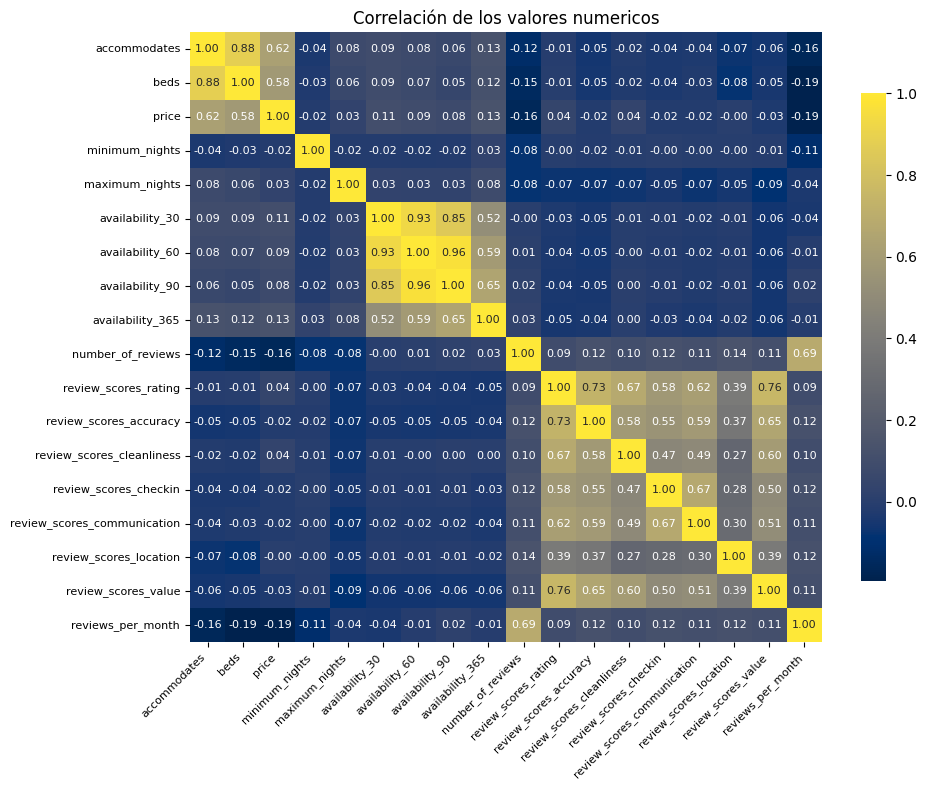

In [13]:
correl = dfnumerics.select_dtypes('number')

plt.figure(figsize=(10, 8))
sns.heatmap(
    correl.corr(),
    annot=True,
    cmap='cividis',
    fmt=".2f",                      # limits to 2 decimals
    annot_kws={"size": 8},          # controls number text size
    cbar_kws={"shrink": 0.8}        # makes colorbar smaller
)
plt.title(
    'Correlación de los valores numericos',
    fontsize=12                     # smaller title
)
plt.xticks(fontsize=8, rotation=45, ha='right')  # smaller rotated labels
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date'],
      dtype='object')

In [15]:
roomsFilter = df.loc[:,
                     ['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
                    'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
                    'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
                    'maximum_nights', 'has_availability', 'availability_30',
                    'availability_60', 'availability_90', 'availability_365','city'
                         
                     ]
                     ]
roomsFilter

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,city
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,malaga
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,madrid
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,sevilla
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,barcelona
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,...,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,girona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,27241318,ES MOLI D'EN SION - Villa with private pool in...,Enjoy the peace of the countryside in this bea...,80839530,Sa Pobla,None,Entire home/apt,10,4,5,...,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",3130.0,7,1125,VERDADERO,26,37,37,243,mallorca
6997,27244243,101.108_New building apartment with two double...,Apartment in Cadaqu�s center. 1rst �floor. Ele...,151496825,Cadaqu�s,None,Entire home/apt,4,1,2,...,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",990.0,1,1125,VERDADERO,24,40,40,40,girona
6998,27244794,101.38_Apartment with one doble bedroom and te...,101.38.- Apartment placed Sa T�rtora � Sant An...,151496825,Cadaqu�s,None,Entire home/apt,2,1,1,...,"TV,Kitchen,Buzzer/wireless intercom,Family/kid...",720.0,1,1125,VERDADERO,0,0,0,0,girona
6999,27245117,MATILLA - Fant�stico apartamento con garaje,Apartamento espacioso a 7 minutos del centro d...,137859766,Cadaqu�s,None,Entire home/apt,6,2,3,...,"Kitchen,Free parking on premises,Heating,Washe...",1100.0,2,31,VERDADERO,2,31,61,151,girona


In [16]:
reviewsFilter = df.loc[:,
                       ['number_of_reviews', 'first_review_date', 'last_review_date',
                        'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month','city','insert_date'
                           
                       ]
                       ]
reviewsFilter

,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,malaga,31/07/2018
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,madrid,10/01/2020
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,sevilla,29/07/2019
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,barcelona,10/01/2020
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,1,13/03/2020,13/03/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,7.0,mallorca,23/04/2020
6997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,girona,30/08/2018
6998,1,23/09/2018,23/09/2018,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,6.0,girona,31/12/2019
6999,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,girona,31/07/2018


In [17]:
rooms = df.loc[:,
                ['accommodates', 'bathrooms',
                'bedrooms', 'beds', 'price', 'minimum_nights',
                'maximum_nights', 'availability_30',
                'availability_60', 'availability_90', 'availability_365']
               ]
rooms

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,2,2,1,1.0,400.0,3,365,7,20,40,130
1,1,1,1,1.0,170.0,4,40,0,0,0,162
2,4,1,2,2.0,990.0,2,120,26,31,31,270
3,2,2,1,1.0,400.0,2,730,9,23,49,300
4,5,1,2,5.0,900.0,1,180,0,19,49,312
...,...,...,...,...,...,...,...,...,...,...,...
6996,10,4,5,7.0,3130.0,7,1125,26,37,37,243
6997,4,1,2,2.0,990.0,1,1125,24,40,40,40
6998,2,1,1,2.0,720.0,1,1125,0,0,0,0
6999,6,2,3,5.0,1100.0,2,31,2,31,61,151


In [18]:
reviews = df.loc[:, 
                    ['number_of_reviews', 'first_review_date', 'last_review_date',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value']
                    ]
reviews


,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
6996,1,13/03/2020,13/03/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0
6997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,1,23/09/2018,23/09/2018,1000.0,100.0,100.0,100.0,100.0,100.0,100.0
6999,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


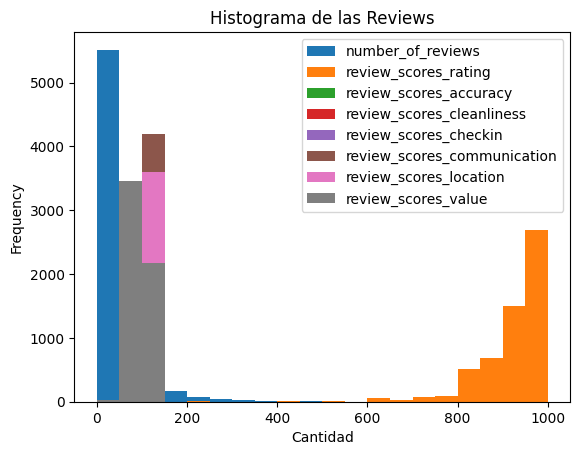

In [19]:
reviewsPlot = reviews.plot.hist(bins=20)
plt.title('Histograma de las Reviews')
plt.xlabel('Cantidad')
plt.show()

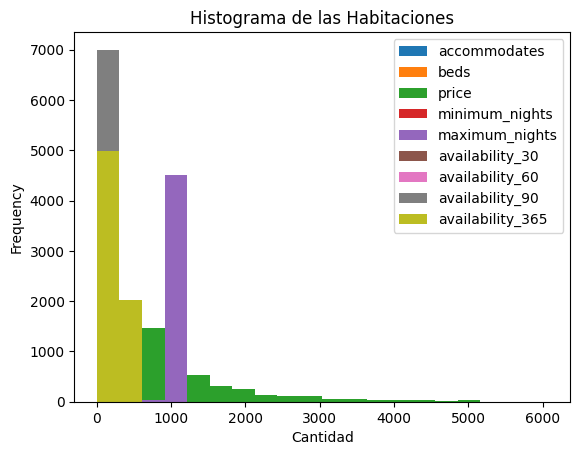

In [20]:
roomsPlot = rooms.plot.hist(bins=20)
plt.title('Histograma de las Habitaciones')
plt.xlabel('Cantidad')
plt.show()

<Figure size 5000x600 with 0 Axes>

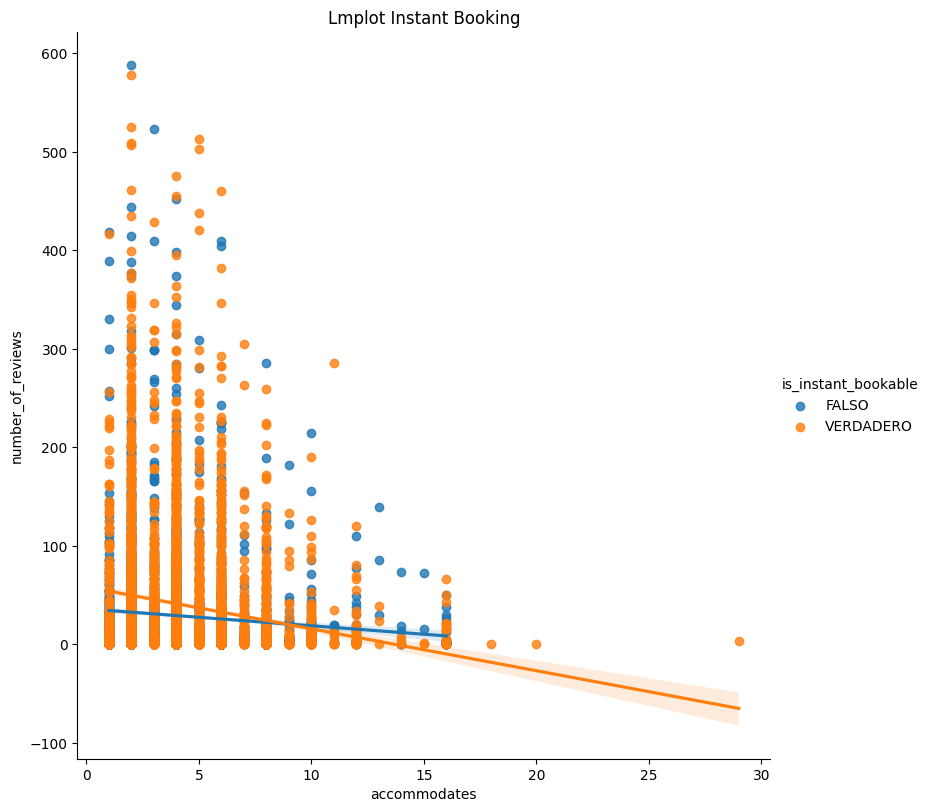

In [21]:
plt.figure(figsize=(50, 6))
sns.lmplot(data = df, x='accommodates', y='number_of_reviews',hue = 'is_instant_bookable',height=8)
plt.title('Lmplot Instant Booking')
plt.show()

<Figure size 5000x600 with 0 Axes>

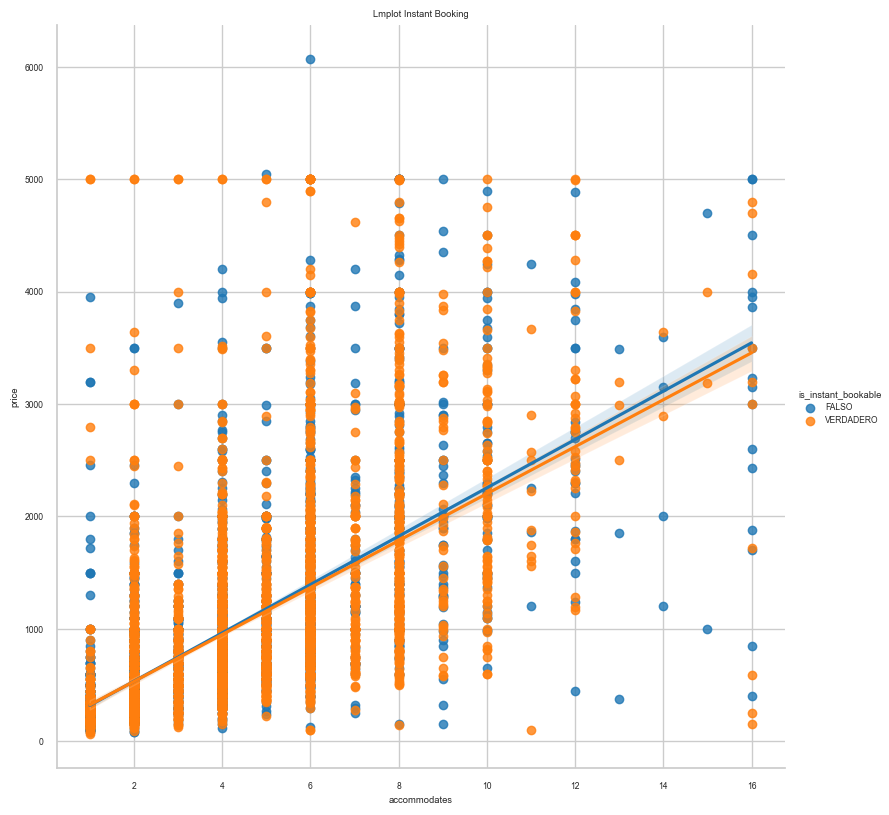

In [47]:
plt.figure(figsize=(50, 6))
sns.lmplot(data = df, x='accommodates', y='price',hue = 'is_instant_bookable',height=8)
plt.title('Lmplot Instant Booking')
plt.show()

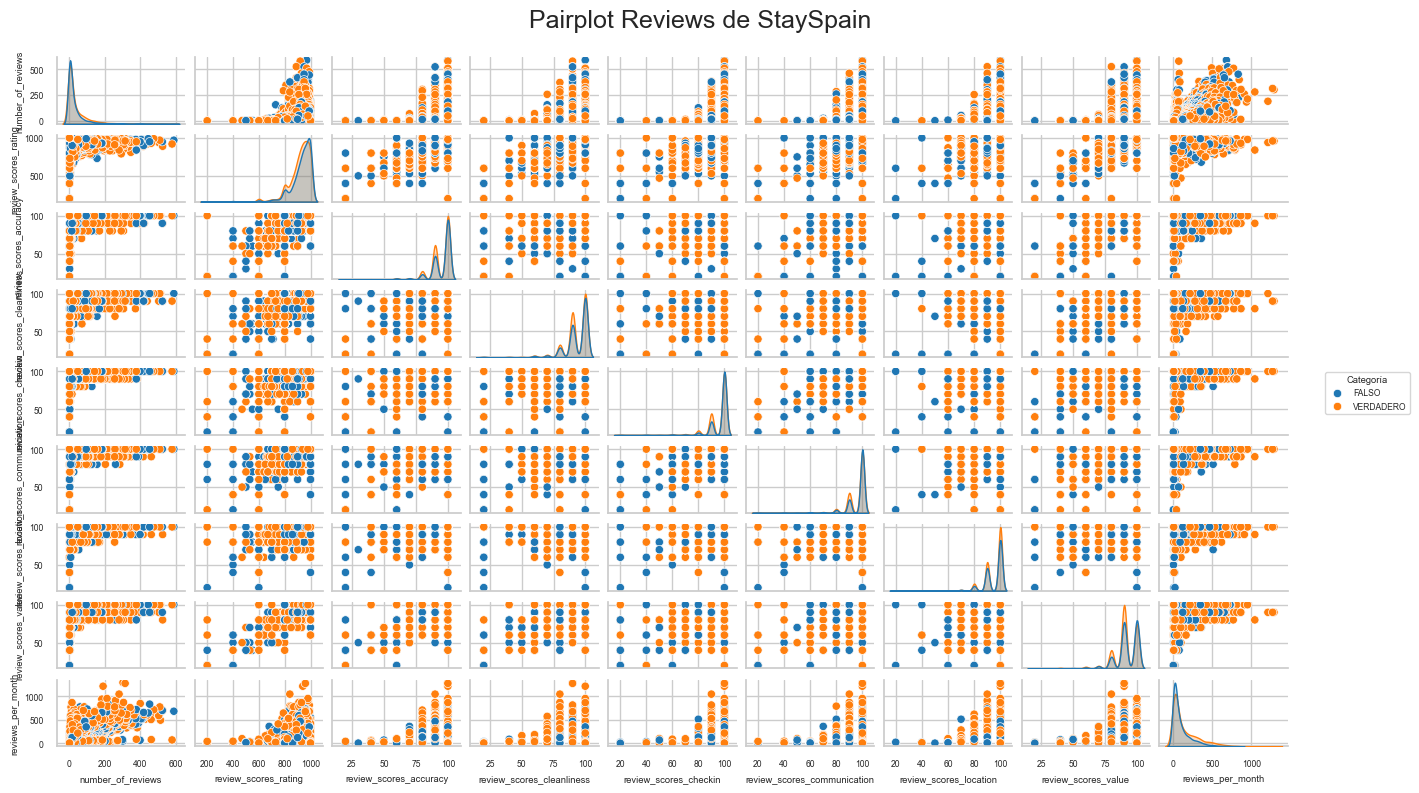

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=0.56) 
sns.set_style("whitegrid")
plot = sns.pairplot(reviewsFilter,hue='is_instant_bookable')

plot.fig.set_size_inches(14, 8)  # (ancho, alto)

plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92, right=0.92)

plot.fig.suptitle('Pairplot Reviews de StaySpain', fontsize=18)

plot._legend.set_bbox_to_anchor((1.01, 0.5))  # (x, y) → x > 1 para que salga fuera  # opción para ponerle un borde
plot._legend.set_title("Categoría")  # cambia el título de la leyenda si quieres
plot._legend.set_frame_on(True)

plt.show()

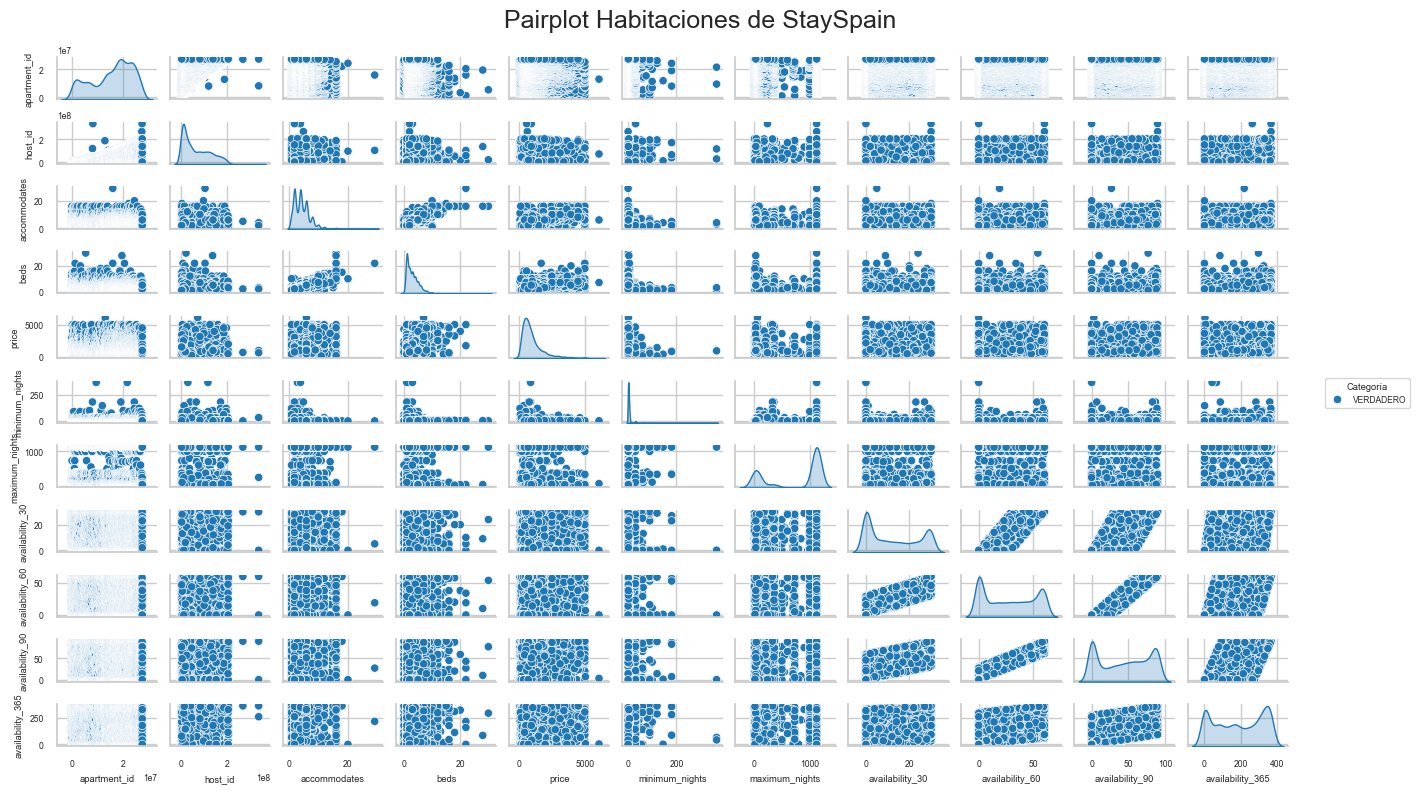

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=0.56) 
sns.set_style("whitegrid")
plot = sns.pairplot(roomsFilter,hue='has_availability')

plot.fig.set_size_inches(14, 8)  # (ancho, alto)

plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92, right=0.92)

plot.fig.suptitle('Pairplot Habitaciones de StaySpain', fontsize=18)

plot._legend.set_bbox_to_anchor((1.01, 0.5))  # (x, y) → x > 1 para que salga fuera  # opción para ponerle un borde
plot._legend.set_title("Categoría")  # cambia el título de la leyenda si quieres
plot._legend.set_frame_on(True)

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\2570435625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='accommodates', ylabel='price'>

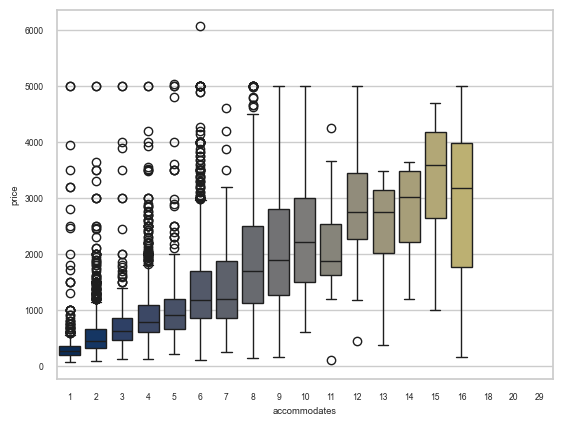

In [24]:
sns.boxplot(
    data=dfnumerics,
    x='accommodates',
    y='price',
    palette='cividis'
)


In [25]:
reviewsFilter

,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,malaga,31/07/2018
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,madrid,10/01/2020
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,sevilla,29/07/2019
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,barcelona,10/01/2020
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,1,13/03/2020,13/03/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,7.0,mallorca,23/04/2020
6997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,girona,30/08/2018
6998,1,23/09/2018,23/09/2018,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,6.0,girona,31/12/2019
6999,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,girona,31/07/2018


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\1511481106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='number_of_reviews'>

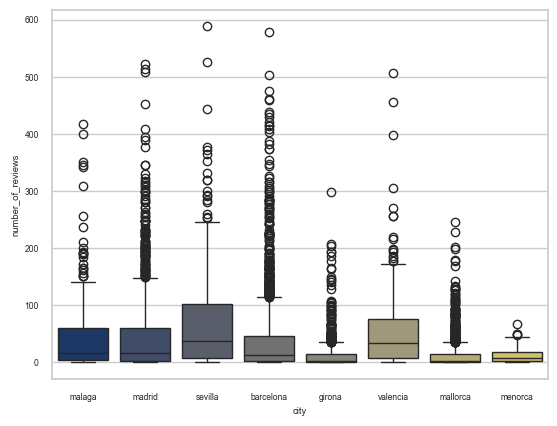

In [26]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='number_of_reviews',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\3277157076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='price'>

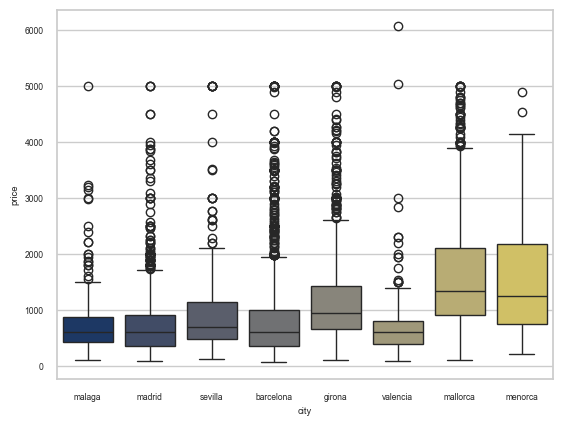

In [27]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='price',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\2958375681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='room_type', ylabel='price'>

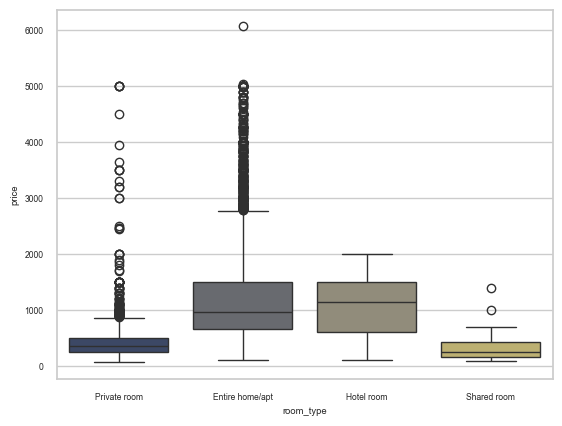

In [28]:
sns.boxplot(
    data=roomsFilter,
    x='room_type',
    y='price',
    palette='cividis'
)

In [29]:
# sns.boxplot(
#     data=roomsFilter,
#     x='apartment_id',
#     y='price',
#     palette='cividis'
# )

In [30]:
roomsFilter.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365', 'city'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\1233295759.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='bedrooms', ylabel='price'>

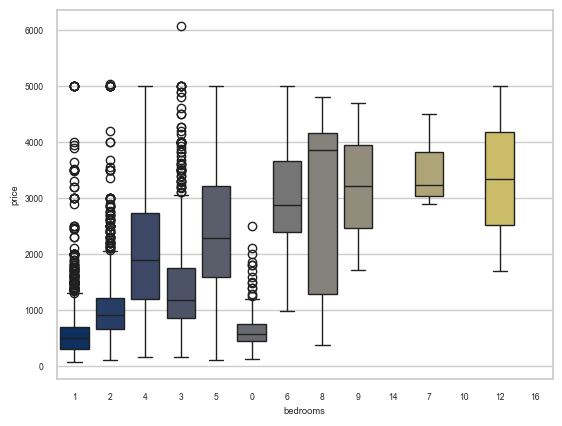

In [31]:
sns.boxplot(
    data=roomsFilter,
    x='bedrooms',
    y='price',
    palette='cividis'
)

In [32]:
reviewsFilter

,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,malaga,31/07/2018
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,madrid,10/01/2020
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,sevilla,29/07/2019
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,barcelona,10/01/2020
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,1,13/03/2020,13/03/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,7.0,mallorca,23/04/2020
6997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,girona,30/08/2018
6998,1,23/09/2018,23/09/2018,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,6.0,girona,31/12/2019
6999,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,girona,31/07/2018


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\2974616239.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='reviews_per_month'>

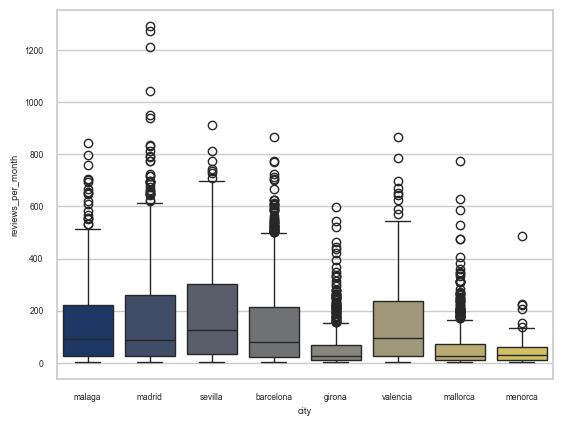

In [35]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='reviews_per_month',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\2798830327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='review_scores_rating'>

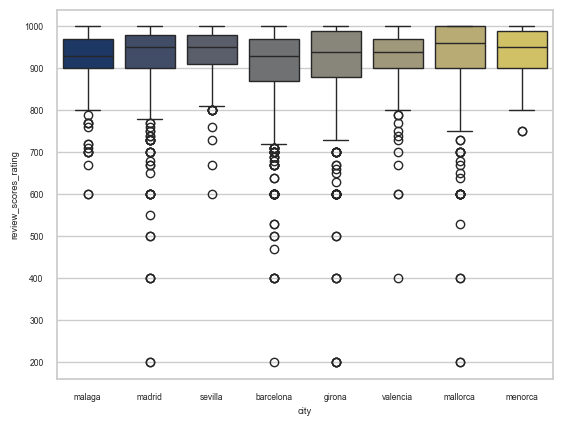

In [36]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='review_scores_rating',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\1095599709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='review_scores_value'>

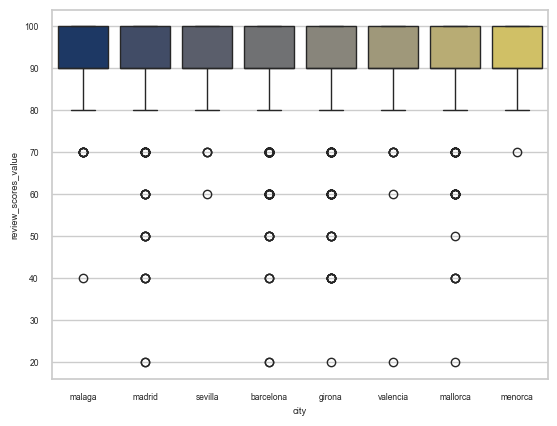

In [39]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='review_scores_value',
    palette='cividis'
)

In [41]:
roomsFilter.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365', 'city'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\695336772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_30'>

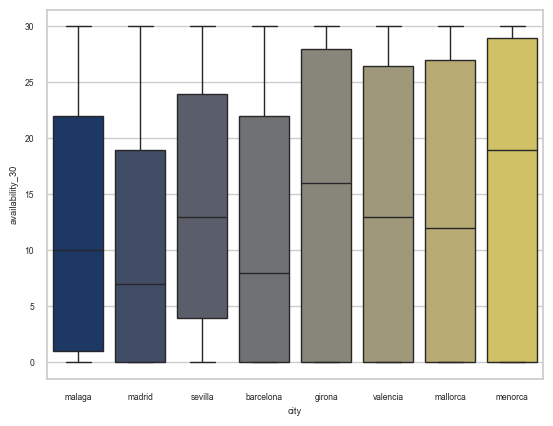

In [43]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_30',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\3556815173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_60'>

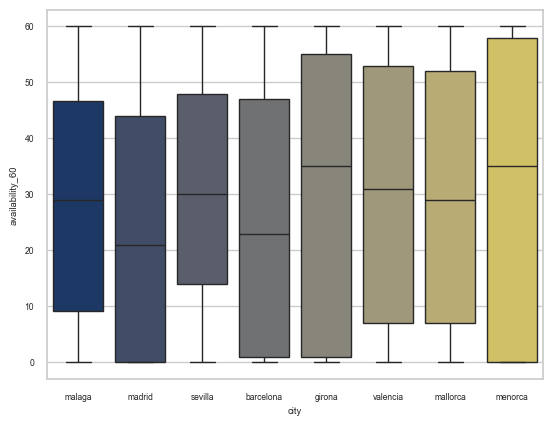

In [44]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_60',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\3260253664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_90'>

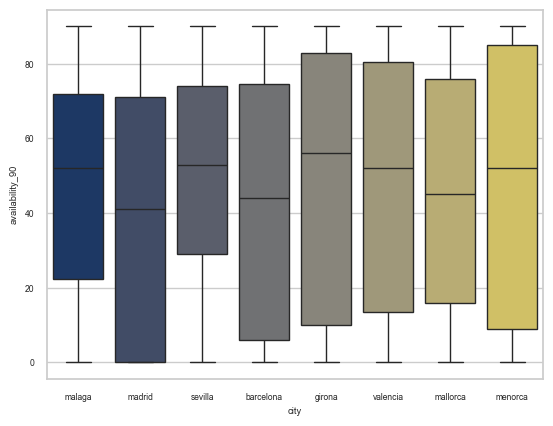

In [45]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_90',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5620\1577553409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_365'>

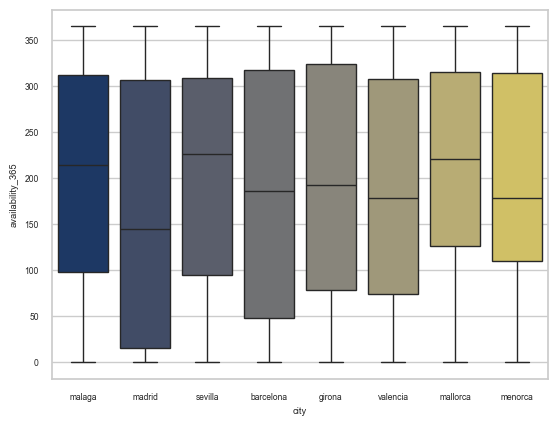

In [46]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_365',
    palette='cividis'
)

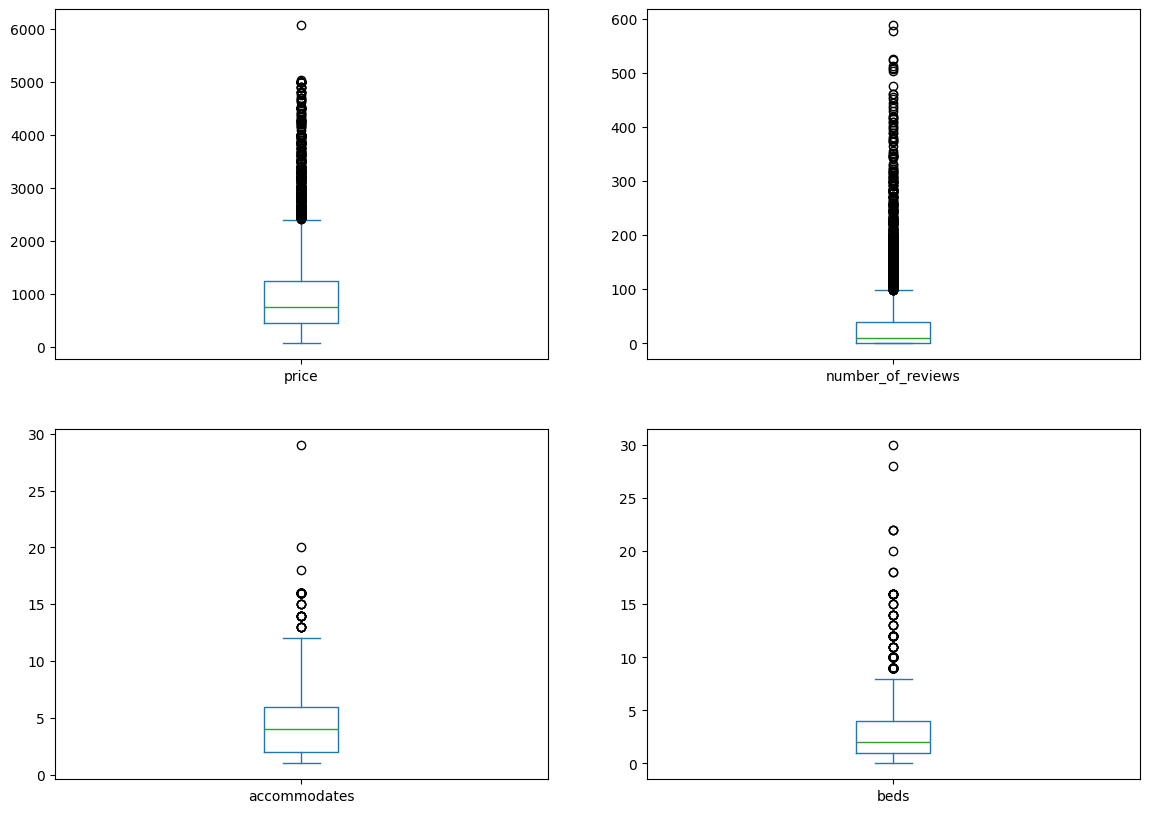

In [5]:
df[['price', 'number_of_reviews', 'accommodates', 'beds']].plot.box(subplots=True, figsize=(14,10), layout = (2,2));

In [6]:
df.isnull().sum()

apartment_id                      0
name                              3
description                      29
host_id                           0
neighbourhood_name                0
neighbourhood_district         2760
room_type                         0
accommodates                      0
bathrooms                        32
bedrooms                         29
beds                              3
amenities_list                   17
price                           131
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              1254
last_review_date               1255
review_scores_rating           1327
review_scores_accuracy         1336
review_scores_cleanliness      1330
review_scores_checkin          1341
review_scores_communication 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 7001 non-null   int64  
 1   name                         6998 non-null   object 
 2   description                  6972 non-null   object 
 3   host_id                      7001 non-null   int64  
 4   neighbourhood_name           7001 non-null   object 
 5   neighbourhood_district       4241 non-null   object 
 6   room_type                    7001 non-null   object 
 7   accommodates                 7001 non-null   int64  
 8   bathrooms                    6969 non-null   object 
 9   bedrooms                     6972 non-null   object 
 10  beds                         6998 non-null   float64
 11  amenities_list               6984 non-null   object 
 12  price                        6870 non-null   float64
 13  minimum_nights    